In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
multivariate_data=test_new.loc[500:24999,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','RWWIHOA_HWT0',
                                          'AEWIHOAKZ_V0','AEDAHO_T9_V2']]
multivariate_data = multivariate_data.set_index('dateTime')
multivariate_data=multivariate_data.loc[::-1]

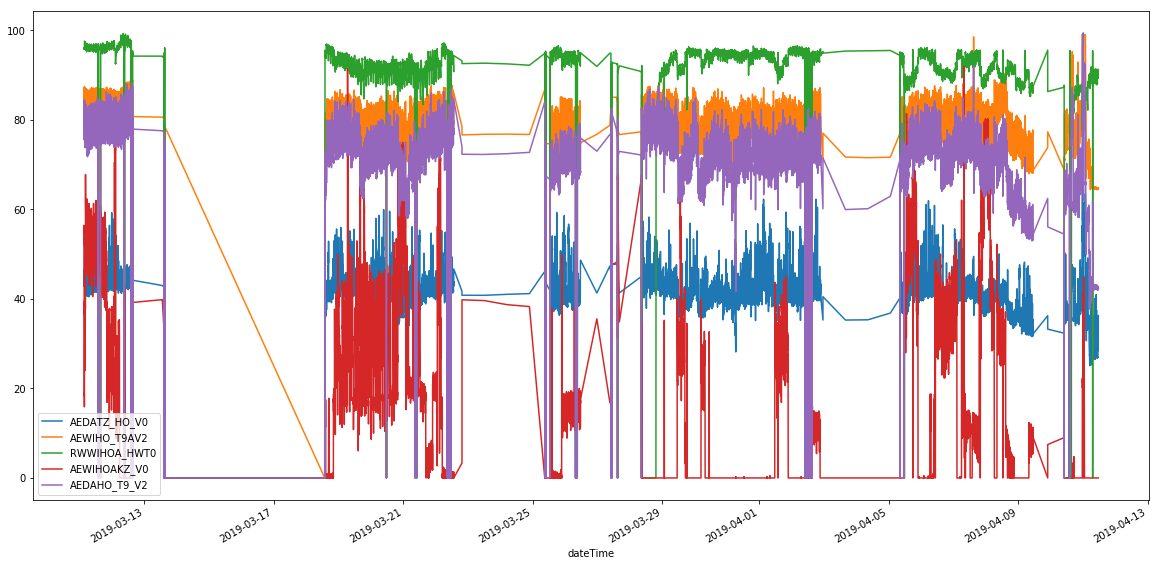

In [8]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [9]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

shape of multivariate_data:  (24500, 5)
shape of multivariate_data_drop_zero:  (13212, 5)


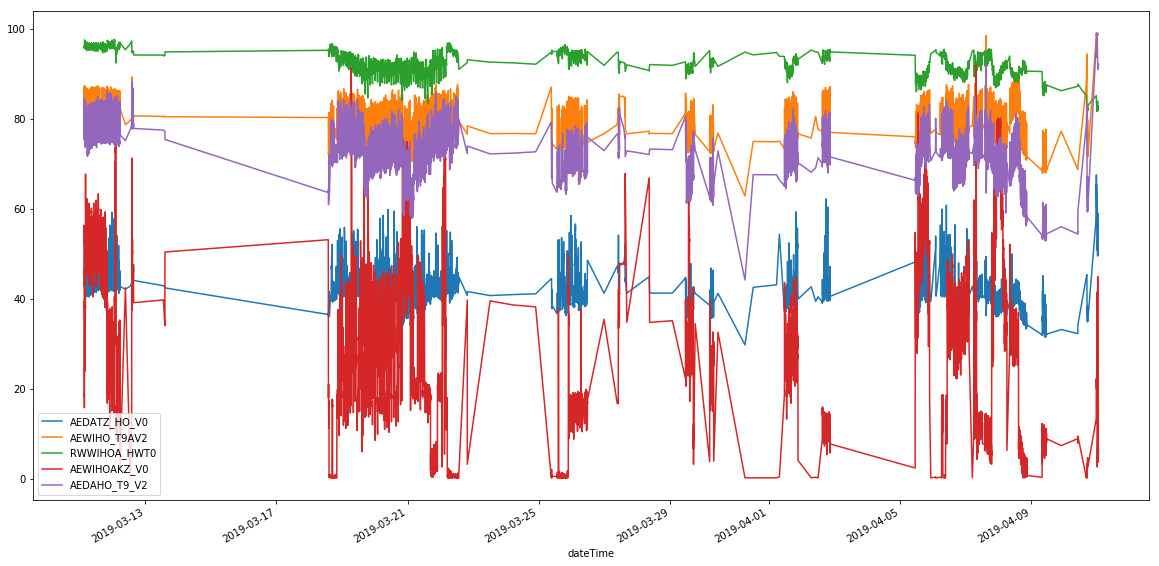

In [10]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

multivariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [11]:
print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
dataset=np.array(multivariate_data_drop_zero)

multivariate_data_drop_zero head: 
                      AEDATZ_HO_V0  AEWIHO_T9AV2  RWWIHOA_HWT0  AEWIHOAKZ_V0  \
dateTime                                                                      
2019-03-11 03:14:00     46.119388     79.178306     96.063659     54.778231   
2019-03-11 03:15:00     46.534541     81.659117     96.103362     54.704687   
2019-03-11 03:16:00     46.555631     86.055430     96.038536     56.415287   
2019-03-11 03:17:00     45.940449     87.113691     95.957508     55.230932   
2019-03-11 03:18:00     44.218947     87.266264     96.018279     53.037212   

                     AEDAHO_T9_V2  
dateTime                           
2019-03-11 03:14:00     83.327361  
2019-03-11 03:15:00     84.314814  
2019-03-11 03:16:00     84.380943  
2019-03-11 03:17:00     83.279853  
2019-03-11 03:18:00     79.963124  


In [32]:
NumberOfElements=int(len(dataset)*0.8)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_input=dataset[0:NumberOfElements,0:-1]
print('train_input shape: ',train_input.shape)
train_output=dataset[0:NumberOfElements,-1]
print('train_output shape: ',train_output.shape)

test_input=dataset[NumberOfElements:len(dataset),0:-1]
print('test_input shape: ',test_input.shape)
test_output=dataset[NumberOfElements:len(dataset),-1]
print('test_output shape: ',test_output.shape)

# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  10569
dataset length:  13212
train_input shape:  (10569, 4)
train_output shape:  (10569,)
test_input shape:  (2643, 4)
test_output shape:  (2643,)


In [33]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [34]:
train_model=LinearRegression(fit_intercept=False,normalize=True).fit(train_input,train_output)
print(train_model)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)


In [35]:
predicted_output=train_model.predict(test_input)

In [36]:
print(predicted_output)

[68.77814662 68.77811945 69.08949138 ... 89.62590771 89.66325855
 89.5929316 ]


size of actual op:  2643
size of predicted op:  2643


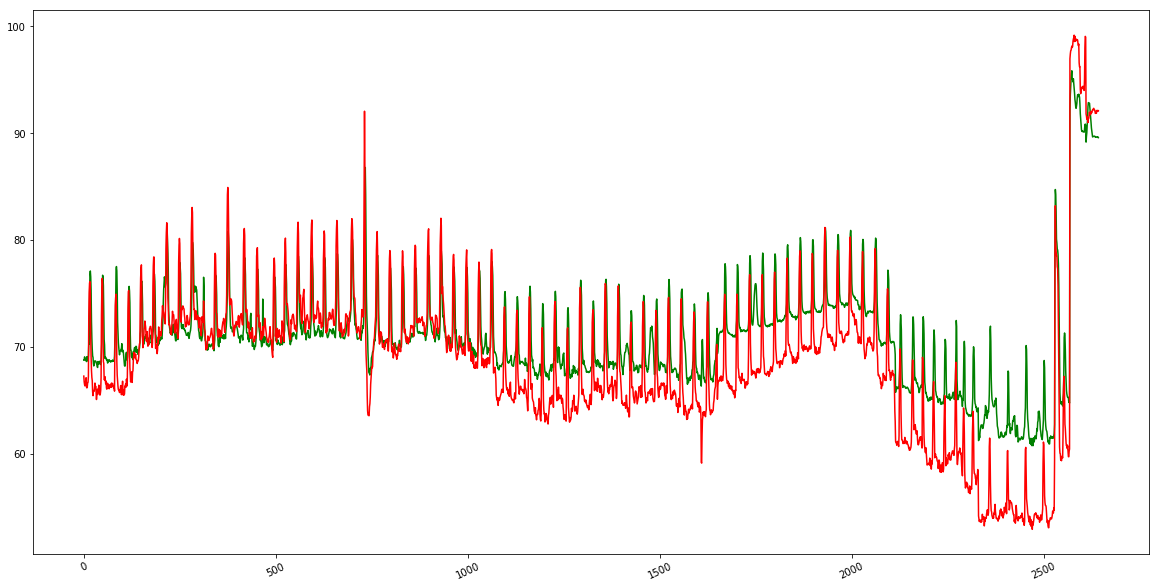

In [37]:
print('size of actual op: ',test_output.size)
print('size of predicted op: ',predicted_output.size)
plt.plot(predicted_output,color='green')
plt.plot(test_output,color='red')
# plt.plot(y,color='red')
plt.xticks( rotation=25)
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)